In [1]:
# Fashion-MINST数据集

In [3]:
import torchvision
import torchvision.transforms as transforms #处理数据模块

In [4]:
# DataLoader,TensorDataset -> 对数据结构、归纳方式进行变换
# torchvision.transforms -> 对数据集的数字本身进行修改

In [7]:
mnist = torchvision.datasets.FashionMNIST(root = "/Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST" #本地目录
                                          ,download = True # 未找到数据集时是否下载
                                          ,train = True # 是否是训练的数据集，是的话下载较大的数据集
                                          ,transform = transforms.ToTensor()
                                         ) # 实例化数据

Extracting /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST/FashionMNIST/raw
Processing...
Done!


/Users/feishuoren/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1603740477510/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
mnist #对于数据的说明

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
len(mnist)

60000

In [10]:
mnist.data # 特征张量

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [11]:
mnist.data.shape # [60000, 1, 28, 28]

torch.Size([60000, 28, 28])

In [12]:
# 数据维度
#（sample_size,H->height,W->width,C->color）
# (样本量，像素H W，颜色通道3 RGB 或 4 RGB透明度)

In [13]:
mnist.targets #标签

tensor([9, 0, 0,  ..., 3, 0, 5])

In [14]:
mnist.targets.unique() #标签分类

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
mnist.classes #标签分类对应的名称

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [17]:
import matplotlib.pyplot as plt
import numpy

In [18]:
mnist[0][0].shape

torch.Size([1, 28, 28])

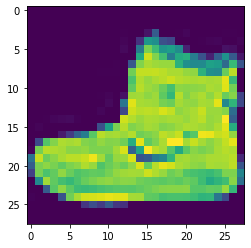

In [19]:
plt.imshow(mnist[0][0].view(28,28).numpy()) # imageshow

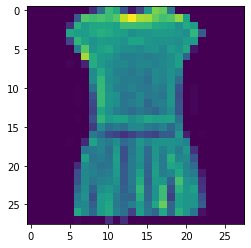

In [20]:
plt.imshow(mnist[3][0].view(28,28).numpy())

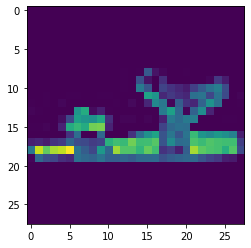

In [22]:
plt.imshow(mnist[59999][0].view(28,28).numpy())

In [23]:
# mnist数据集已经打包好特征和标签，不需要TensorDataset
# 对mnist进行小批量划分

In [24]:
# """神经网络训练流程
# 设置超参数 lr步长，动量gamma，初始权重w0（需要的话），迭代次数epochs，批量batch_size
# 导入数据，并切分batches
# 定义神经网络架构
# 定义损失函数
# 定义优化算法
# 在epoch和batch上循环，执行优化算法
# """

# """每次迭代
# 调整数据结构，数据预处理
# 向前传播，计算初始损失
# 反向传播，计算损失函数对w的偏导数
# 迭代当前权重
# 清空本轮梯度
# 完成模型进度与效果监控 ：损失loss、准确率accuracy
# """

In [56]:
# 导入库
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader
import torchvision
import torchvision.transforms as transforms

In [28]:
# 确定数据，确定超参数

lr = 0.15
gamma = 0.8
epochs = 5
bs = 128 # 图像数据通常bs为32的倍数

In [39]:
mnist = torchvision.datasets.FashionMNIST(root = "/Users/feishuoren/Projects/pytorch_learning/Datasets/FashionMNIST"
                                                  ,download = False
                                                  ,train = True
                                                  ,transform = transforms.ToTensor()
                                                  )

In [40]:
batchedData = DataLoader(mnist
                        ,batch_size = bs
                        ,shuffle = True)

In [41]:
for x,y in batchedData:
    print(x.shape)
    print(y.shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [45]:
input_ = mnist.data[0].numel() # numel张量中的元素个数 28*28
input_

784

In [46]:
output_ = len(mnist.targets.unique())
output_

10

In [47]:
#view(-1,) 需要对数据结构进行改变，-1作为占位，表示请pytorch自动计算-1这个位置的维度应该是多少

test_x = torch.randn(30,40)
test_x = test_x.view(-1,20)
test_x.shape

torch.Size([60, 20])

In [49]:
# 定义神经网络架构

class Model(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super(Model,self).__init__()
        
        self.linear1 = nn.Linear(in_features,128,bias = False) #线性层：上下层神经元个数和偏差
        self.output = nn.Linear(128,out_features,bias = False)

    def forward(self,x):
        x = x.view(-1,28*28)
        sigma1 = torch.relu(self.linear1(x))
        sigma2 = F.log_softmax(self.output(sigma1),dim=1)
        
        return sigma2     

In [50]:
# 定义损失函数、优化算法、梯度下降流程

In [75]:
# 定义训练函数

def fit(net,batchedData,lr=0.01,epochs=3,gamma=0):
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(),lr=lr,momentum=gamma)
    
    correct = 0 # 循环开始前，预测正确的值为0
    samples = 0 # 循环开始前，初始化处理样本数
    for epoch in range(epochs):
        for batch_idx,(x,y) in enumerate(batchedData):
            y = y.view(x.shape[0]) # 降维，将与转换为一维,view(样本数)
            sigma = net.forward(x) # 正向传播
            loss = criterion(sigma,y)
            loss.backward()
            opt.step()
            opt.zero_grad()
            
            # 求解准确率：全部判断正确的样本量/已经看过的样本量
            yhat = torch.max(sigma,1)[1] # torch.max函数中的索引为1的部分
            correct += torch.sum(yhat==y) # 布尔值的加和
            
            samples += x.shape[0] # 每训练一个batch的数据，模型见过的数据就会增加x所含的数据量
            
            if(batch_idx + 1) % 125 == 0 or batch_idx == len(batchedData) -1: # 每N个batch打印一次 或者 在每个批次最后一个打印一次
                print("Epoch{}:[{}/{}({:.0f})%],Loss:{:.6f},Accuracy:{:.3f}".format(
                    epoch+1 
                    ,samples # 分子：已经查看过的数据
                    ,epochs*len(batchedData.dataset) # 分母：在现有epochs设置中，模型一共要查看多少数据，batchedData.dataset展示bs里所有的数据
                    ,100 * samples/(epochs*len(batchedData.dataset)) # 已经查看过的数据的百分比
                    ,loss.data.item() # loss包含数值和数值类型，使用loss.data取出数值，item()显示数值
                    ,float(100*correct/samples) #计算百分数不敢确定格式的，套上float变为tensor
                ))


In [63]:
test_l = torch.tensor([[0.3,0.4,0.23],[0.7,0.32,0.76]])
test_l

tensor([[0.3000, 0.4000, 0.2300],
        [0.7000, 0.3200, 0.7600]])

In [68]:
torch.max(test_l)

tensor(0.7600)

In [69]:
torch.max(test_l,1) # values:最大预测值，indices最大预测值的序号

torch.return_types.max(
values=tensor([0.4000, 0.7600]),
indices=tensor([1, 2]))

In [70]:
torch.max(test_l,1)[1] # softmax的预测标签

tensor([1, 2])

In [71]:
test_l2 = torch.tensor([True,False,True]) # 1,1,0

In [72]:
torch.sum(test_l2) # 1+ 1+ 0 = 2

tensor(2)

In [78]:
# 训练与评估

torch.manual_seed(142)
net = Model(in_features = input_,out_features = output_)

fit(net,batchedData,lr = lr,epochs = epochs,gamma = gamma)

Epoch1:[16000/300000(5)%],Loss:0.565388,Accuracy:71.075
Epoch1:[32000/300000(11)%],Loss:0.485966,Accuracy:76.363
Epoch1:[48000/300000(16)%],Loss:0.381312,Accuracy:78.473
Epoch1:[60000/300000(20)%],Loss:0.589136,Accuracy:79.517
Epoch2:[76000/300000(25)%],Loss:0.454601,Accuracy:80.645
Epoch2:[92000/300000(31)%],Loss:0.322591,Accuracy:81.386
Epoch2:[108000/300000(36)%],Loss:0.325734,Accuracy:81.996
Epoch2:[120000/300000(40)%],Loss:0.387415,Accuracy:82.334
Epoch3:[136000/300000(45)%],Loss:0.450129,Accuracy:82.733
Epoch3:[152000/300000(51)%],Loss:0.278533,Accuracy:83.103
Epoch3:[168000/300000(56)%],Loss:0.385525,Accuracy:83.412
Epoch3:[180000/300000(60)%],Loss:0.307836,Accuracy:83.617
Epoch4:[196000/300000(65)%],Loss:0.294801,Accuracy:83.922
Epoch4:[212000/300000(71)%],Loss:0.418623,Accuracy:84.175
Epoch4:[228000/300000(76)%],Loss:0.282205,Accuracy:84.379
Epoch4:[240000/300000(80)%],Loss:0.430110,Accuracy:84.533
Epoch5:[256000/300000(85)%],Loss:0.230341,Accuracy:84.744
Epoch5:[272000/300000